In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [126]:
df = pd.read_csv("diabetes (2).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#data exploration

In [129]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset shape:", df.shape)

print("\nMissing values in each column")
print(df.isnull().sum())

print("\nBasic statistics of the dataset:")
print(df.describe())

print("\nDistribution of the target variable (Outcome):")
print(df['Outcome'].value_counts())


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset shape: (768, 9)

Missing values in each column
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age     

# data visualization

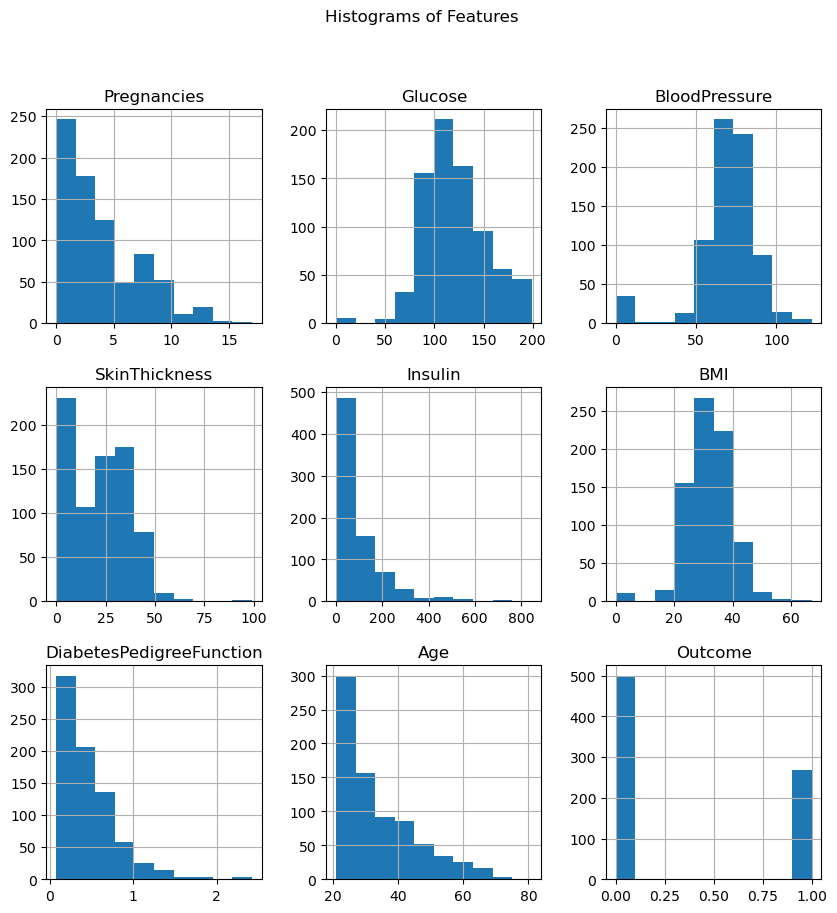

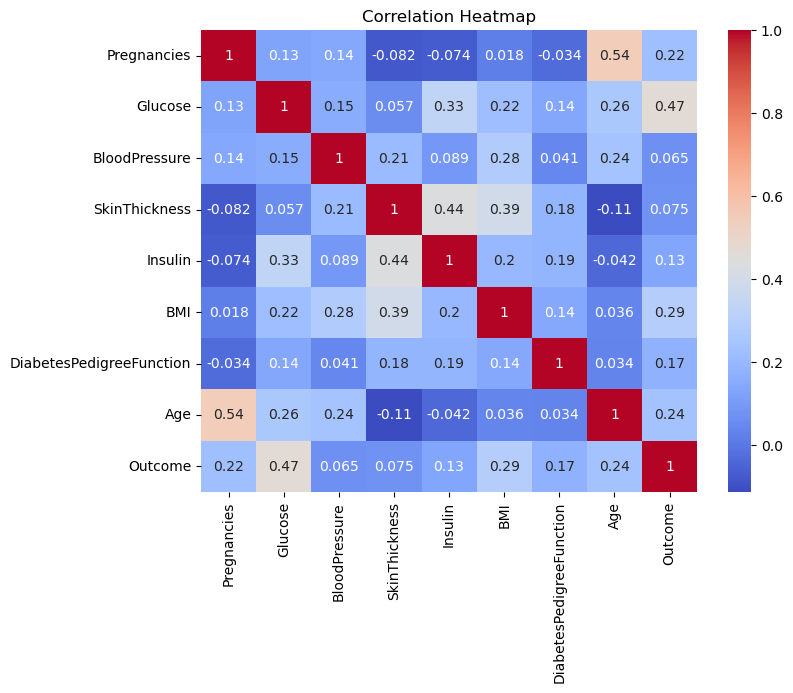

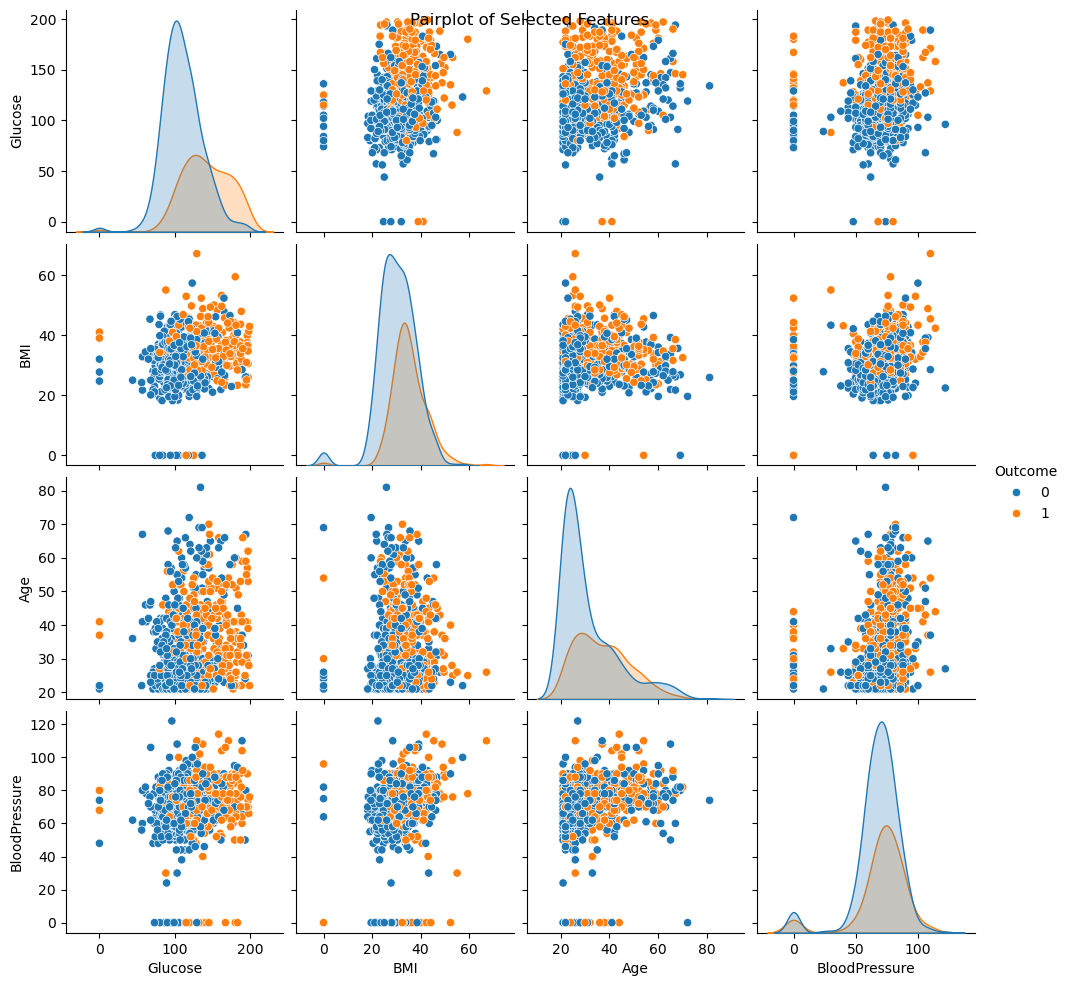

In [132]:
# histograms for all features
df.hist(bins=10, figsize=(10, 10))
plt.suptitle("Histograms of Features")
plt.show()

# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# pairplot for selected features
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'BloodPressure'])
plt.suptitle("Pairplot of Selected Features")
plt.show()

data preprocessing

In [134]:
# replace 0s with the mean value in specific columns

columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_replace:
    df[col] = df[col].replace(0, df[col].mean())

# verify changes
print("\nDataset statistics after handling missing values:")
print(df.describe())

                                                
# split the dataset into features (x) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# split the data into training and testing sets (80% train, 20% test)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

#save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


Dataset statistics after handling missing values:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.76023

explanation:

handling missing values: replace 0s with the mean for specific columns.

train-test split: Divide the dataset into training (80%) and testing (20%) set.

Feature Scalling: Standardize features to have a mean of 0 and a standard devision of 1.

# Build and Evaluate Models

In [137]:
# Initialize lists to store model names and accuracies

models = []
accuracies = []

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(train_X, train_y)
y_pred_lr = model_lr.predict(test_X)
accuracy_lr = accuracy_score(test_y, y_pred_lr)
models.append("Logistic Regression")
accuracies.append(accuracy_lr)

print("\nLogistic Regression Results:")
print ("Accuracy:", accuracy_lr)
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred_lr))
print ("Classification Report:\n", classification_report(test_y, y_pred_lr))

# Support Vector Machine (SVM)
model_svm = SVC(kernel='linear')
model_svm.fit(train_X, train_y)
y_pred_svm = model_svm. predict(test_X)
accuracy_svm = accuracy_score(test_y, y_pred_svm)
models.append("SVM" )
accuracies.append(accuracy_svm)

print("\nSVM Results:")
print ("Accuracy:", accuracy_svm)
print ("Confusion Matrix:\n", confusion_matrix(test_y, y_pred_svm))
print("Classification Report:\n", classification_report(test_y, y_pred_svm))


# random forest

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(train_X, train_y)
y_pred_rf = model_rf.predict(test_X)
accuracy_rf = accuracy_score(test_y, y_pred_rf)
models.append("RandomForest")
accuracies.append(accuracy_rf)

print("\nRandom Forest Results:")
print ("Accuracy:", accuracy_rf) 
print ("Confusion Matrix:\n", confusion_matrix(test_y, y_pred_rf))
print("Classification Report:\n", classification_report (test_y, y_pred_rf))

# K-Nearest Neighbors (KNN)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_X, train_y)
y_pred_knn = model_knn.predict(test_X)
accuracy_knn = accuracy_score(test_y, y_pred_knn)
models.append ("KNN")
accuracies.append (accuracy_knn)

print("\nKNN Results:")
print("Accuracy:", accuracy_knn) 
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred_knn))
print("Classification Report:\n", classification_report(test_y, y_pred_knn))

# Naive Bapes
model_nb = GaussianNB()
model_nb.fit(train_X, train_y)
y_pred_nb = model_nb.predict(test_X)
accuracy_nb = accuracy_score(test_y, y_pred_nb)
models.append("Naive Bayes")
accuracies.append(accuracy_nb)

print("\nNaive Bayes Results:")
print("Accuracy:", accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred_nb))
print("Classification Report:\n", classification_report(test_y, y_pred_nb))



Logistic Regression Results:
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[83 16]
 [20 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154


SVM Results:
Accuracy: 0.7597402597402597
Confusion Matrix:
 [[82 17]
 [20 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154


Random Forest Results:
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[80 19]
 [17 38]]
Classification Report:
      

In [138]:
#compare model performance

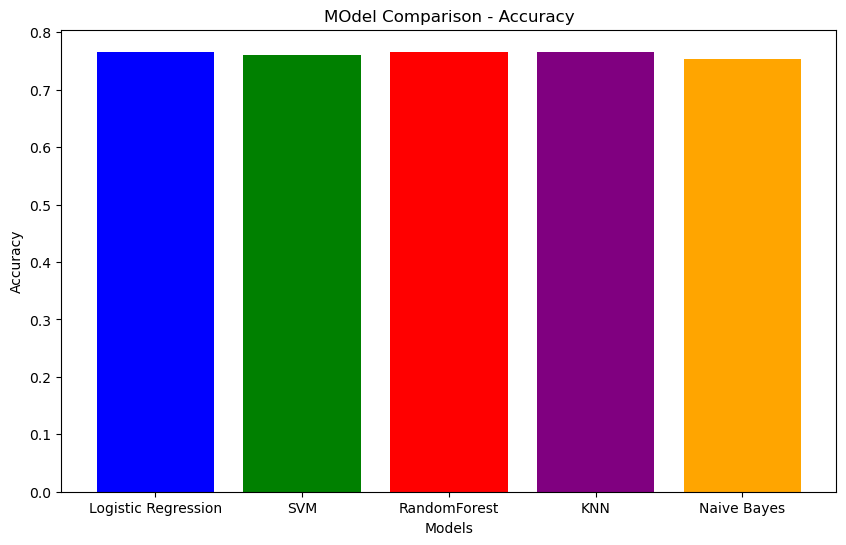

In [139]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue','green','red', 'purple','orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('MOdel Comparison - Accuracy')
plt.show()

#save the best model

In [141]:
import joblib

# save th erandom forest model (best performing model)
joblib.dump(model_rf, 'diabetes_model.pkl')
print("\nRandom Forest model saved as 'diabetes_model.pkl'.")

# load the model (example)
loaded_model = joblib.load('diabetes_model.pkl')


Random Forest model saved as 'diabetes_model.pkl'.


# user input for prediction (GUI)

In [143]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# load the saved model and scaler

In [145]:
# load the saved model and scaler
loaded_model = joblib.load('diabetes_model.pkl')
scaler = joblib.load('scaler.pkl')

In [146]:
# function to predict diabetes
def predict_diabetes():
   try:
        #get user input from the GUI
        user_data = {
            'Pregnancies': float(entry_pregnancies.get()),
            'Glucose': float(entry_glucose.get()),
            'BloodPressure': float(entry_blood_pressure.get()),
            'SkinThickness': float(entry_skin_thickness.get()),
            'Insulin': float(entry_insulin.get()),
            'BMI': float(entry_bmi.get()),
            'DiabetesPedigreeFunction': float(entry_diabetes_pedigree.get()),
            'Age': float(entry_age.get())
        }

        # convert the dictionary to a dataframe
        user_df = pd.DataFrame([user_data])

        user_scaled = scaler.transform(user_df)

        prediction = loaded_model.predict(user_scaled)
        probability = loaded_model.predict_proba(user_scaled)

        #Display the result in a message box
        if prediction[0] == 1:
            result_message = "Prediction: YOu are likely to have diabetes."
        else:
            result_message = "Prediction: YOu are unlikely to have diabetes."

        result_message += f"\nProbability: {probability[0][1] * 100:.2f}%"
        messagebox.showinfo("Prediction Result", result_message)

   except ValueError:
      messagebox.showerror("Input Error", "Please enter valid numeric values in all fields.")
    
   



In [149]:
root = tk.Tk()
root.title("Diabetes Prediction")

''

In [164]:
tk.Label(root, text="Number of Pregnancies:").grid(row=0, column=0, padx=10, pady=5)
entry_pregnancies = tk.Entry(root)
entry_pregnancies.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Glucose Level:").grid(row=1, column=0, padx=10, pady=5)
entry_glucose = tk.Entry(root)
entry_glucose.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Blood Pressure:").grid(row=2, column=0, padx=10, pady=5)
entry_blood_pressure = tk.Entry(root)
entry_blood_pressure.grid(row=2, column=1, padx=10, pady=5)

tk.Label(root, text="Skin Thickness:").grid(row=3, column=0, padx=10, pady=5)
entry_skin_thickness = tk.Entry(root)
entry_skin_thickness.grid(row=3, column=1, padx=10, pady=5)

tk.Label(root, text="Insulin Level:").grid(row=4, column=0, padx=10, pady=5)
entry_insulin = tk.Entry(root)
entry_insulin.grid(row=4, column=1, padx=10, pady=5)

tk.Label(root, text="BMI:").grid(row=5, column=0, padx=10, pady=5)
entry_bmi = tk.Entry(root)
entry_bmi.grid(row=5, column=1, padx=10, pady=5)

tk.Label(root, text="Diabetes Pedigree Function:").grid(row=6, column=0, padx=10, pady=5)
entry_diabetes_pedigree = tk.Entry(root)
entry_diabetes_pedigree.grid(row=6, column=1, padx=10, pady=5)

tk.Label(root, text="Age:").grid(row=7, column=0, padx=10, pady=5)
entry_age = tk.Entry(root)
entry_age.grid(row=7, column=1, padx=10, pady=5)


In [166]:
# create a "Predict button"

predict_button = tk.Button(root, text="Predict", command=predict_diabetes)
predict_button.grid(row=8, column=0, columnspan=2, pady=10)

In [ ]:
root.mainloop()